# Milk Quality Prediction

Our goal in this project is to design a machine learning model that makes a prediction based on the milk quality data we have.

## Data Set - Variables

* pH: This Column defines PH alus of the milk which ranges from 3 to 9.5 max : 6.25 to 6.90
* Temprature: This Column defines Temprature of the milk which ranges from 34'C to 90'C max : 34'C to 45.20'C
* Taste: This Column defines Taste of the milk which is categorical data 0 (Bad) or 1 (Good) max : 1 (Good)
* Odor: This Column defines Odor of the milk which is categorical data 0 (Bad) or 1 (Good) max : 0 (Bad)
* Fat: This Column defines Fat of the milk which is categorical data 0 (Low) or 1 (High) max : 1 (High)
* Turbidity: This Column defines Turbidity of the milk which is categorical data 0 (Low) or 1 (High) max : 1 (High)
* Colour: This Column defines Colour of the milk which ranges from 240 to 255 max : 255
* Grade: This Column defines Grade (Target) of the milk which is categorical data Where Low (Bad) or Medium (Moderate) High


### Import libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

### Read the data

In [2]:
df = pd.read_csv("C:/Users/riach/OneDrive/Documents/DATA SCIENCE FILES/milknew.csv")

In [3]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [5]:
df.shape

(1059, 8)

##### We have 7 numeric values and 1 categorical value.

Converting the categorical variable (grade) into numerical.

In [6]:
df.loc[df["Grade"] == 'high', "Grade"] = 2
df.loc[df["Grade"] == 'medium', "Grade"] = 1
df.loc[df["Grade"] == 'low', "Grade"] = 0
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


In [7]:
df["Grade"] = df["Grade"].astype(str).astype(int)

### Missing values

In [8]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

No missing values present.

### Statistical description of the data

In [9]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415,0.836638
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424,0.787868
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000,0.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000,1.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000,1.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000,2.000000


In [10]:
df.corr()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565,0.028980
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511,-0.417789
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654,0.025500
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361,0.149626
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151,0.151002
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436,-0.153634
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000,-0.056986
Grade,0.028980,-0.417789,0.025500,0.149626,0.151002,-0.153634,-0.056986,1.000000


<AxesSubplot:>

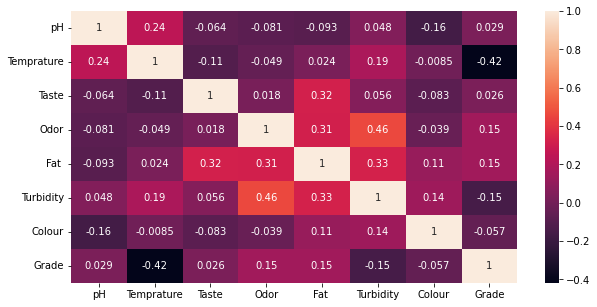

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

We can see that 'Turbidity' and 'Odor' have strong positive correlation.

And 'Temperature' and 'Grade' have strong negative correlation.

### Graphical analysis

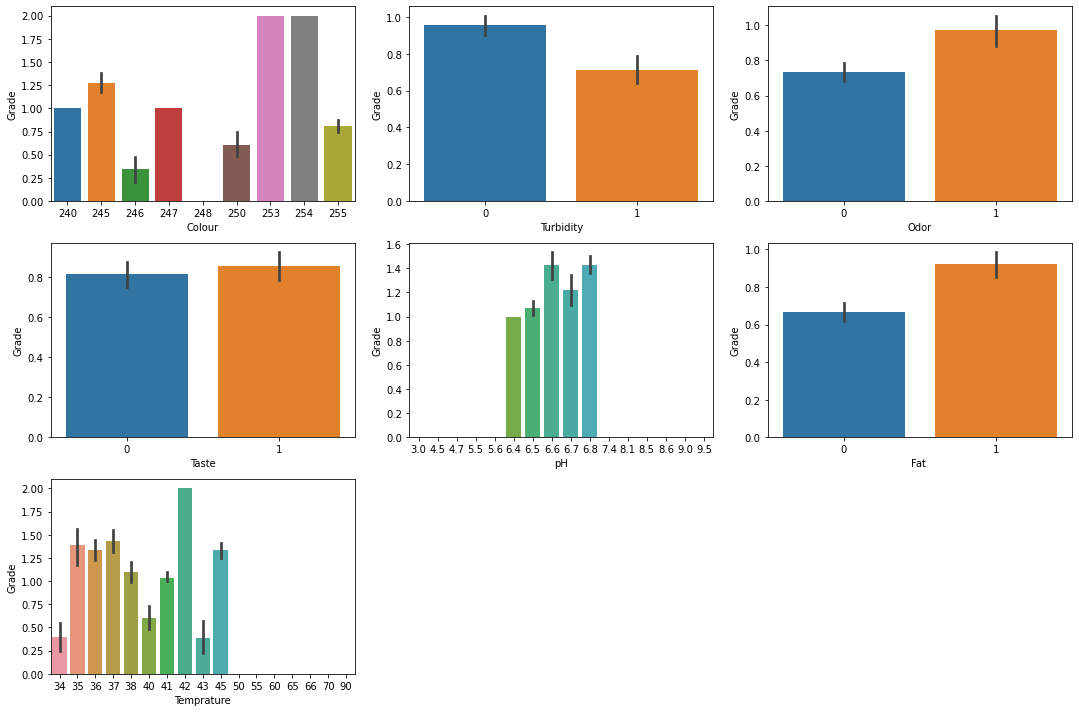

In [12]:
countplot_list = ["Colour","Turbidity","Odor","Taste","pH","Fat ","Temprature"]
plt.figure(figsize=(15,10))
x=1
for i in countplot_list:
    plt.subplot(3,3,x)
    sns.barplot(x=i,y='Grade',data=df)
    x = x + 1
plt.tight_layout()

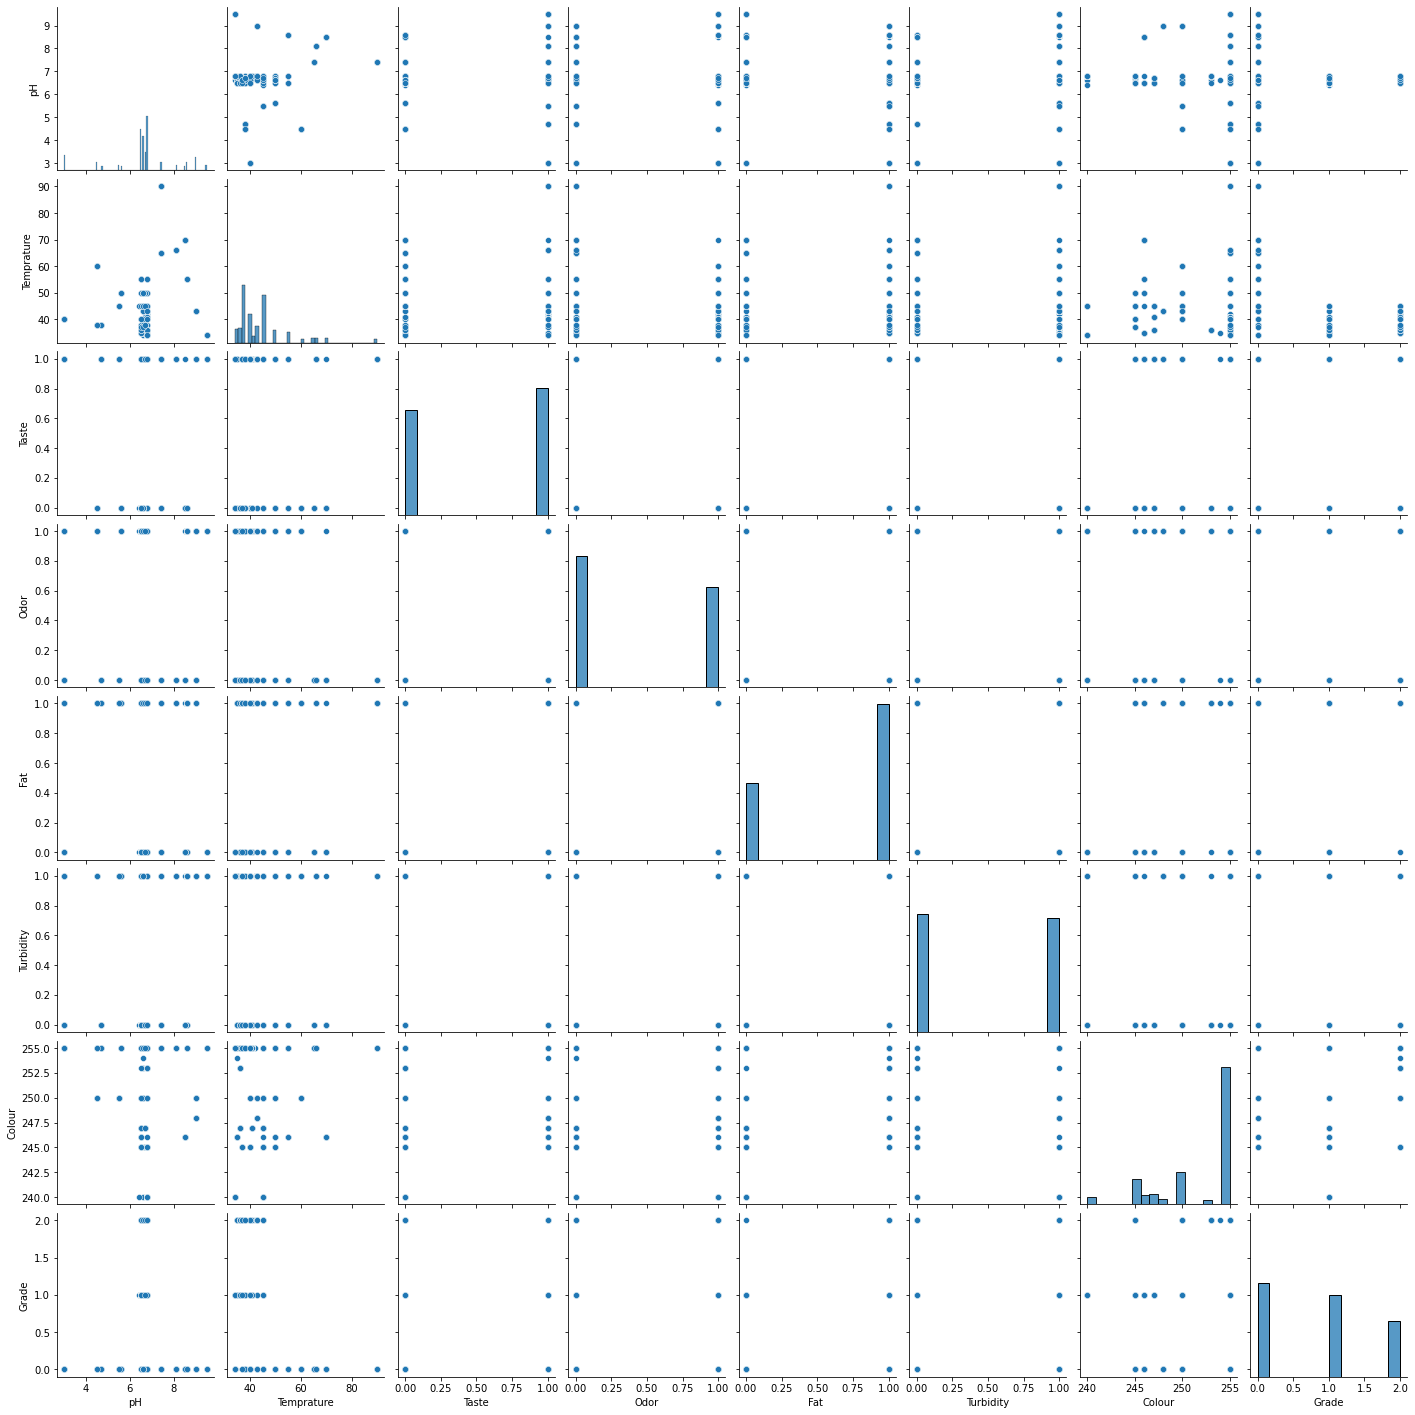

In [13]:
sns.pairplot(df,palette="rocket")

# Modelling

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [15]:
x=df.iloc[:,:7]
x.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255


In [16]:
y=df.iloc[:,7]
y.head()

0    2
1    2
2    0
3    0
4    1
Name: Grade, dtype: int32

In [17]:
type(df)

pandas.core.frame.DataFrame

We will use 80% of data for training and 20% for testing.

## Linear Regression

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
971,3.0,40,1,1,1,1,255
838,6.8,40,1,0,1,0,245
336,8.1,66,1,0,1,1,255
20,6.6,45,0,1,1,1,250
621,6.8,45,1,1,1,0,245


In [19]:
LinReg=LinearRegression()
LinReg.fit(x_train,y_train)

LinearRegression()

In [20]:
y_predicts =LinReg.predict(x_test)
y_predicts

array([ 1.04005177,  0.27501122,  0.86454317,  0.27501122,  0.94434979,
        1.02309533,  0.89780465,  0.91598836,  1.16662813,  0.87520936,
        1.07144974,  0.7924685 ,  0.89780465,  0.95858167,  1.28677498,
        1.23903423,  0.00925088,  0.44948245,  0.27174606,  1.07144974,
        0.87520936,  0.6278104 ,  1.18953466,  1.15629337,  1.16662813,
        1.63803929,  1.19955818,  1.14938793,  0.36489174,  1.02919341,
        0.87705921,  1.04005177,  1.25298075,  0.27501122,  1.19955818,
        0.04913614,  1.18953466,  1.14938793,  0.82760748,  1.02309533,
        0.88608289,  0.94108463,  0.93261337,  1.14938793,  0.74401277,
        1.63803929,  0.04913614,  0.94434979,  0.7924685 ,  1.15624628,
        1.15624628,  0.2301039 ,  0.36489174, -0.85341362,  1.15629337,
        0.06877615,  1.14938793, -0.85341362,  0.62902492,  0.9371606 ,
        0.91598836,  0.04913614,  1.02309533,  0.97073384,  0.89780465,
        0.91598836,  0.95858167,  0.95858167,  0.87705921, -0.85

Accuracy of testing dataset (Linear regression)

In [21]:
LinReg.score(x_test,y_test)

0.24230510618458045

Accuracy of training dataset (Linear regression)

In [22]:
LinReg.score(x_train,y_train)

0.28237353937131404

## Logistic Regression

In [23]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [24]:
y_predicts =LR.predict(x_test)
y_predicts

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 0, 2, 1, 0,
       2, 1, 1, 2, 1, 1, 0, 1, 0, 1, 2, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 1,
       1, 2, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 1, 1,
       1, 1, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       2, 0, 1, 0, 1, 1, 2, 1, 1, 1, 0, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 2, 2, 0, 0, 1,
       2, 2, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1,
       2, 0, 0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1, 2, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1])

In [25]:
print(confusion_matrix(y_test, y_predicts)) 

[[52 10 11]
 [10 79  3]
 [18 10 19]]


In [26]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

<Figure size 432x288 with 0 Axes>

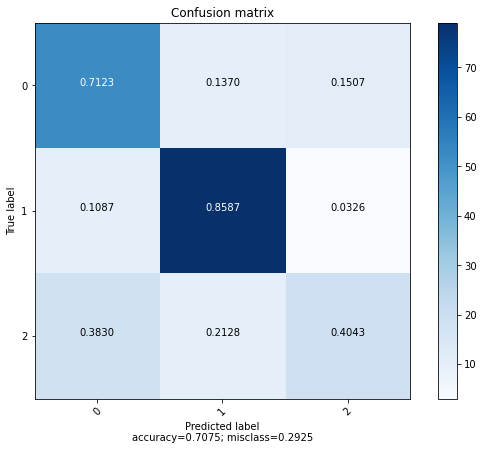

In [30]:
cnf_matrix = confusion_matrix(y_test, y_predicts,labels=[0, 1, 2])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, target_names=[0, 1, 2])

Accuracy of training dataset

In [31]:
LR.score(x_train,y_train)

0.7154663518299882

Accuracy of test dataset

In [32]:
LR.score(x_test,y_test)

0.7075471698113207

In [33]:
LR_Predict = LR.predict(x_train)
LR_Accuracy = accuracy_score(y_train, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

Accuracy: 0.7154663518299882


Classification report for LR model

In [34]:
resultLR = classification_report(y_test, y_predicts)
print(resultLR)

              precision    recall  f1-score   support

           0       0.65      0.71      0.68        73
           1       0.80      0.86      0.83        92
           2       0.58      0.40      0.48        47

    accuracy                           0.71       212
   macro avg       0.67      0.66      0.66       212
weighted avg       0.70      0.71      0.70       212



## Random Forest Classifier

In [35]:
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
325,6.8,45,0,0,0,1,255
595,6.5,37,0,0,0,0,255
126,8.5,70,0,0,0,0,246
512,6.8,45,1,1,1,0,245
578,6.5,38,1,0,1,0,255


In [36]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

RandomForestClassifier()

In [37]:
y_predicts =RFC.predict(x_test)
y_predicts

array([1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 2, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 0,
       2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 1, 0, 2, 1, 1, 0, 2, 0, 0, 1, 1, 1,
       1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 2, 0, 2, 1, 1, 2, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 2, 1, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 0, 1,
       0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0,
       0, 1, 1, 2, 0, 1, 2, 0, 2, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 2, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2, 1, 1,
       2, 1, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [38]:
print(confusion_matrix(y_test, y_predicts))

[[77  0  0]
 [ 0 80  0]
 [ 0  0 55]]


<Figure size 432x288 with 0 Axes>

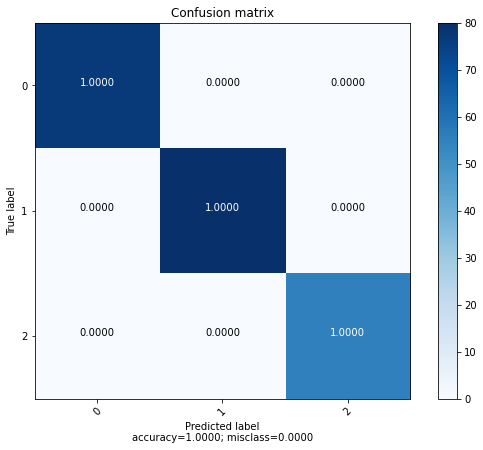

In [39]:
cnf_matrix = confusion_matrix(y_test, y_predicts,labels=[0, 1, 2])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, target_names=[0, 1, 2])

Accuracy of train dataset

In [40]:
RFC.score(x_train,y_train)

1.0

Accuracy of test dataset

In [41]:
RFC.score(x_test,y_test)

1.0

Classification report for RF model

In [42]:
resultRFC = classification_report(y_test, y_predicts)
print(resultRFC)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        80
           2       1.00      1.00      1.00        55

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



In [43]:
RFC_Predict = RFC.predict(x_train)
RFC_Accuracy = accuracy_score(y_train, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

Accuracy: 1.0


## K-Nearest Neighbors Classifier

In [44]:
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
629,6.7,38,1,0,1,0,255
172,6.8,38,0,0,0,0,255
839,6.6,45,0,1,1,1,250
418,6.6,37,1,1,1,1,255
669,4.5,60,0,1,1,1,250


In [45]:
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [46]:
y_predicts =KNN.predict(x_test)
y_predicts

array([1, 1, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 1, 2, 0,
       2, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2, 1,
       2, 1, 1, 1, 0, 2, 0, 1, 2, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 2, 0, 1,
       0, 2, 2, 0, 1, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0, 0, 2, 1, 2, 1, 1, 0,
       1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 0, 1, 0, 1, 1,
       0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 2, 2, 2, 0, 1, 2, 0, 0, 0,
       1, 2, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 0])

In [47]:
cm = metrics.confusion_matrix(y_test, y_predicts)
print(cm)

[[90  0  0]
 [ 0 73  1]
 [ 0  2 46]]


<Figure size 432x288 with 0 Axes>

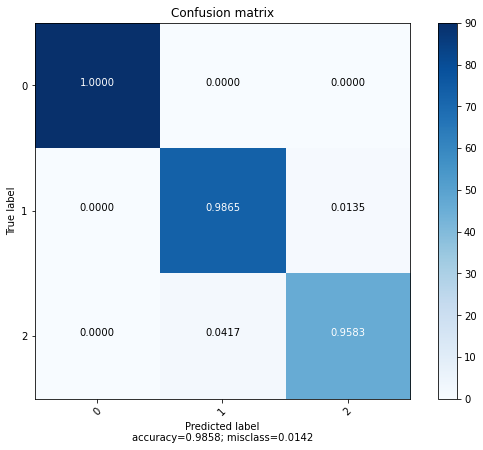

In [48]:
cnf_matrix = confusion_matrix(y_test, y_predicts,labels=[0, 1, 2])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, target_names=[0, 1, 2])

Accuracy of training dataset

In [49]:
KNN.score(x_train,y_train)

0.9940968122786304

Accuracy of test dataset

In [50]:
KNN.score(x_test,y_test)

0.9858490566037735

Classification report for KNN model

In [51]:
resultKNN = classification_report(y_test, y_predicts)
print(resultKNN)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       0.97      0.99      0.98        74
           2       0.98      0.96      0.97        48

    accuracy                           0.99       212
   macro avg       0.98      0.98      0.98       212
weighted avg       0.99      0.99      0.99       212



In [52]:
KNN_Predict = KNN.predict(x_train)
KNN_Accuracy = accuracy_score(y_train, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

Accuracy: 0.9940968122786304


## Decision Tree Classifier

In [53]:
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
201,3.0,40,1,1,1,1,255
213,7.4,90,1,0,1,1,255
850,7.4,65,0,0,0,0,255
441,6.5,36,0,0,1,0,255
171,6.5,38,1,1,1,1,255


In [54]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [55]:
y_predicts =DT.predict(x_test)
y_predicts

array([0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 0, 1,
       0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1, 0,
       2, 2, 0, 0, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, 1, 0, 1,
       2, 2, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 0, 2,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1,
       0, 1, 1, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 2, 2, 0, 2, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0])

In [56]:
print(confusion_matrix(y_test, y_predicts))

[[84  0  0]
 [ 2 70  0]
 [ 0  0 56]]


<Figure size 432x288 with 0 Axes>

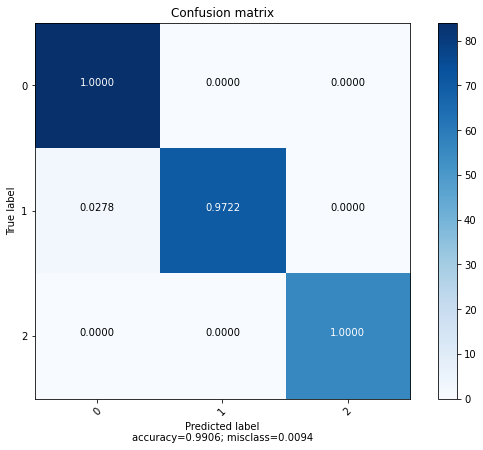

In [57]:
cnf_matrix = confusion_matrix(y_test, y_predicts,labels=[0, 1, 2])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, target_names=[0, 1, 2])

Accuracy of train dataset

In [58]:
DT.score(x_train,y_train)

1.0

Accuracy of test dataset

In [59]:
DT.score(x_test,y_test)

0.9905660377358491

Classification report for DT model

In [60]:
resultDT = classification_report(y_test, y_predicts)
print(resultDT)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        84
           1       1.00      0.97      0.99        72
           2       1.00      1.00      1.00        56

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



In [61]:
DT_Predict = DT.predict(x_train)
DT_Accuracy = accuracy_score(y_train, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

Accuracy: 1.0


# Model Performance Summary

In [62]:
model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression', 'RandomForestClassifier', 'KNeighborsClassifier', 'DecisionTreeClassifier'], 'Accuracy': [LR_Accuracy, RFC_Accuracy, KNN_Accuracy, DT_Accuracy]})


In [63]:
model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

,Model,Accuracy
1,RandomForestClassifier,1.000000
3,DecisionTreeClassifier,1.000000
2,KNeighborsClassifier,0.994097
0,LogisticRegression,0.715466
